<a href="https://colab.research.google.com/github/larevelyn/Aulas_Python/blob/main/material/aulas/PDI/lab04/Filtros_de_Convolu%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objetivos da aula:**

*   Conhecer processo generico de filtro de convolução
*   conhecer os filtros de blurring (suavização)
*   conhecer o filtro de sharpening (realce)
*   conhecer o detetor linhas de canny

**Filtro de convolução**

O **filtro de convolução** é um nomes dados para **filtragem no domínio espacial**. Esse processo ocorre com a aplicação de **filtros** (pequenas matrizes), posicionados sob cada pixel da imagem. Estes filtros, normalmente, são chamados de **kernels (ou núcleos)**. O resultado final do valor do pixel é calculado através de um **produto de convolução**.

Normalmente os **kernels** são matrizes 3x3, 5x5 ou 7x7.



## Desafio 0

Abra o link [https://setosa.io/ev/image-kernels/](https://setosa.io/ev/image-kernels/) e de forma intuitiva altere o valor do filtro/kernel e descubra efeitos resultantes.

In [6]:
!wget https://raw.githubusercontent.com/arnaldojr/cognitivecomputing/master/material/aulas/PDI/lab04/convolution.png /content
!wget https://raw.githubusercontent.com/arnaldojr/cognitivecomputing/master/material/aulas/PDI/lab04/lena.png /content
!wget https://raw.githubusercontent.com/arnaldojr/cognitivecomputing/master/material/aulas/PDI/lab04/saida.png /content
!wget https://raw.githubusercontent.com/arnaldojr/cognitivecomputing/master/material/aulas/PDI/lab04/same_padding_no_strides.gif /content
!wget https://raw.githubusercontent.com/arnaldojr/cognitivecomputing/master/material/aulas/PDI/lab04/tux.png /content

--2024-02-24 19:40:21--  https://raw.githubusercontent.com/arnaldojr/cognitivecomputing/master/material/aulas/PDI/lab04/convolution.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162095 (158K) [image/png]
Saving to: ‘convolution.png.1’

convolution.png.1   100%[===================>] 158.30K  --.-KB/s    in 0.02s   

2024-02-24 19:40:21 (9.12 MB/s) - ‘convolution.png.1’ saved [162095/162095]

/content: Scheme missing.
FINISHED --2024-02-24 19:40:21--
Total wall clock time: 0.2s
Downloaded: 1 files, 158K in 0.02s (9.12 MB/s)
--2024-02-24 19:40:21--  https://raw.githubusercontent.com/arnaldojr/cognitivecomputing/master/material/aulas/PDI/lab04/lena.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.

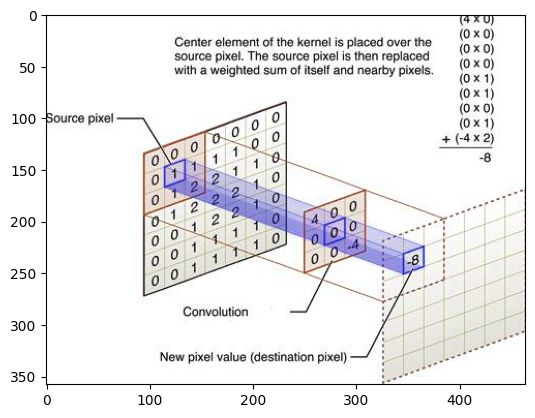

In [7]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread('convolution.png')
plt.imshow(img); plt.show()

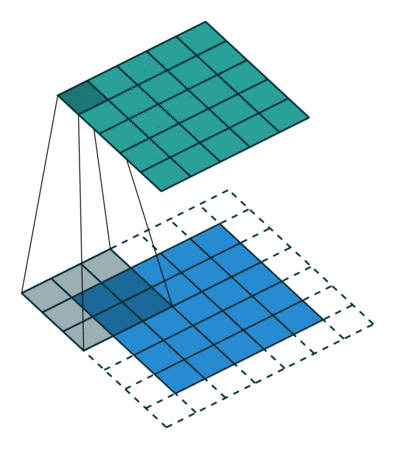

In [8]:
from IPython.display import Image
Image(open('same_padding_no_strides.gif','rb').read())

**Observação**

Embora o nome convolução seja muito usado, na prática realizamos o processo de **correlação**, para realizar a convolução é necessário realizar a inversão da **mascara (matriz)**, o que não é um problema pois em **processamento de imagem**, tipicamente os **kernels** são simétricos, logo os resultados de convolução e correlação não mudam.


## **Implementação na OpenCV**

Podemos implementar o produto de convolução montando uma estrutura com dois for para varrer a imagem toda, pixel-a-pixel.Não é a forma mais eficiente, pois Na OpenCV tem uma função built-in para implementação de filtro de convolução a **cv2.filter2D()**

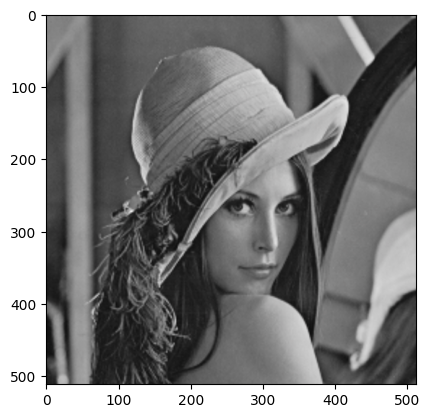

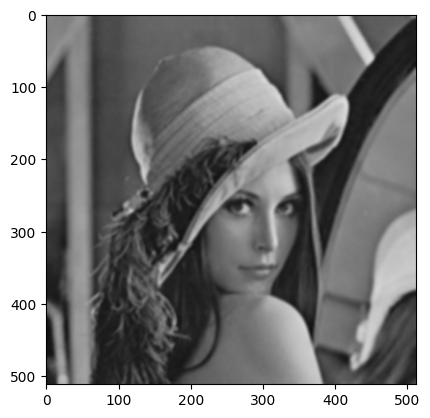

In [9]:
import numpy as np
import cv2


#carrega imagem
img = cv2.imread('lena.png')
plt.imshow(img, cmap="Greys_r", vmin=0, vmax=255); plt.show()

# Define o kernel
kernel = np.array([[1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1],
                   [1, 1, 1, 1 ,1]])
kernel = kernel/(np.sum(kernel) if np.sum(kernel)!=0 else 1)

# Realiza o produto de convolução
imgf = cv2.filter2D(img,-1,kernel)

#exibe resultado filtrado
plt.imshow(imgf, cmap="Greys_r", vmin=0, vmax=255); plt.show()

**FILTROS PARA BLURRING**

O filtro de **blurring (borramento)** consiste na  perda gradual de foco da imagem, produzindo a sensação que ela está borrada. Em outras palavras são filtros passa-baixa.

Existem diversos métodos para construções de kernels para blurring:


*   **filtro da média (box filter)**: blur = cv.blur(img,(5,5))
*   **filtro gaussiano**: blur = cv.GaussianBlur(img,(5,5),0)
*   **filtro da mediana**: blur = cv.medianBlur(img,5)
*   **filtro bilateral**: blur = cv.bilateralFilter(img,9,75,75)

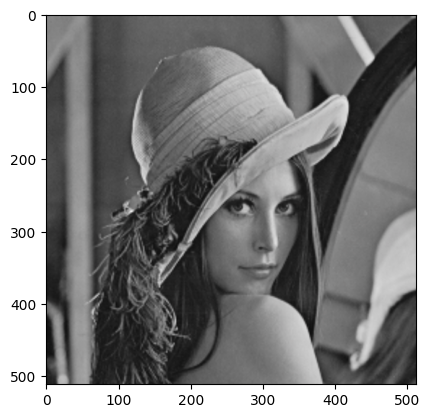

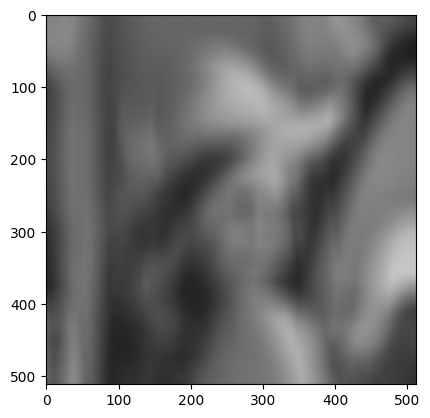

In [10]:
import numpy as np
import cv2

#carrega imagem
img = cv2.imread('lena.png')
plt.imshow(img, cmap="Greys_r", vmin=0, vmax=255); plt.show()

# Realiza o blur
imgf = cv2.blur(img,(51,51),0)

#exibe resultado filtrado
plt.imshow(imgf, cmap="Greys_r", vmin=0, vmax=255); plt.show()

## Desafio 1

Escolha uma imagem da sua preferência e faça um estudo sobre os diferentes tipos de filtros de borramento, analise também o que acontece quando é alterado o tamanho do kernel.



 kernel allterado


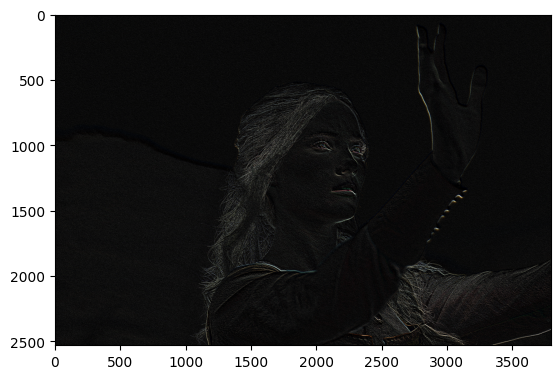

In [22]:
#Implemente seu código aqui.
import numpy as np
import cv2
from matplotlib import pyplot as plt
ciri = cv2.imread('Ciri.jpg')
ciri = cv2.cvtColor(ciri, cv2.COLOR_BGR2RGB)
print('Original')
plt.imshow(ciri, cmap="Greys_r", vmin=0, vmax=255); plt.show()

print('\nMediana')
ciri2 = cv2.medianBlur(ciri, 101)
plt.imshow(ciri2, cmap="Greys_r", vmin=0, vmax=255); plt.show()

print('\nGaussiano')
ciri2 = cv2.GaussianBlur(ciri,(101,101),0)
plt.imshow(ciri2, cmap="Greys_r", vmin=0, vmax=255); plt.show()

kernel = np.array([[-5, -1, -1],
                  [-1, 8, -3],
                  [5, -1, -1]])
ciri3 = cv2.filter2D(ciri,-1,kernel)

print('\n kernel allterado')
plt.imshow(ciri3, cmap="Greys_r", vmin=0, vmax=255); plt.show()


**FILTRO DE SHARPENING**

O filtro de **sharpening** consiste no ganho gradual de foco de uma imagem, produzindo a sensação que ela está cada vez mais bem definida. É uma aproximação da inversa do filtro de blurring.

Existem diversos métodos para construções de kernels para blurring:


*   **filtro Sobel X**: imgf = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)
*   **filtro Sobel Y**: imgf = cv.Sobel(img,cv.CV_64F,0,1,ksize=5)
*   **filtro Laplaciano**: imgf = cv.Laplacian(img,cv.CV_64F)


Abaixo, temos as formas matriciais do filtro de sharpening.

In [ ]:
#Filtro Laplaciano
kernel = np.array([[0, -1, 0],
                   [-1, 4, -1],
                   [0, -1, 0]])

kernel = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]])
#filtro de Sobel X
kernel = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
kernel = np.array([[-1, -2, -1],
                   [ 0, 0, 0],
                   [-1, 0, 1]])

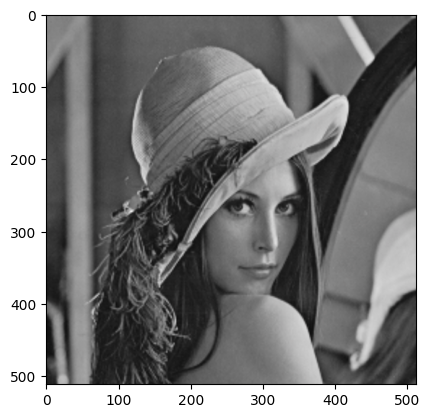

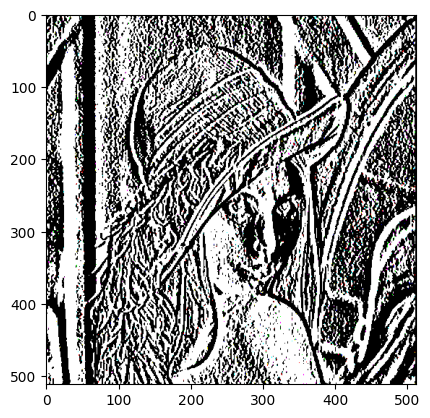

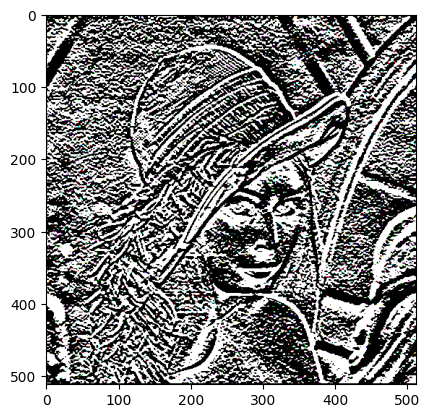

In [16]:
import numpy as np
import cv2


#carrega imagem
img = cv2.imread('lena.png')
plt.imshow(img, cmap="Greys_r", vmin=0, vmax=255); plt.show()



imgf = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
imgf2 = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)

# Monta o kernel filtro
# kernel = np.array([[-1, -1, -1],
#                   [-1, 8, -1],
#                   [-1, -1, -1]])
# # Realiza o produto de convolução

# imgf = cv2.filter2D(img,-1,kernel)

#exibe resultado filtrado
plt.imshow(imgf, cmap="Greys_r", vmin=0, vmax=255);plt.show()
plt.imshow(imgf2, cmap="Greys_r", vmin=0, vmax=255); plt.show()

## Desafio 2

Escolha uma imagem da sua preferência e faça um estudo sobre os diferentes tipos de filtros de contraste, analise também o que acontece quando é alterado o tamanho do kernel.

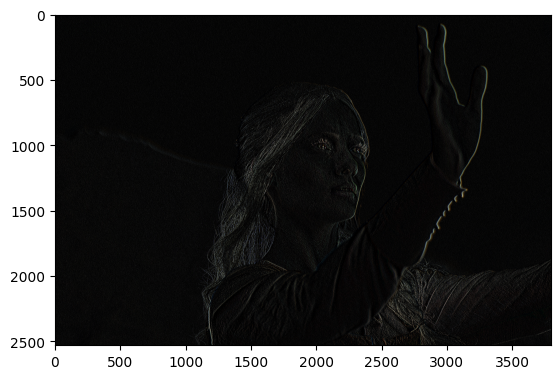

In [64]:
#implemente seu código aqui.

print('Sobel X')
SX = cv2.Sobel(ciri,cv2.CV_64F,1,0,ksize=5)
plt.imshow(SX, cmap="Greys_r", vmin=0, vmax=255);
plt.show()

print('\n Laplaciano')
LP = cv2.Laplacian(ciri,cv2.CV_64F)
plt.imshow(LP, cmap="Greys_r", vmin=0, vmax=255);
plt.show()

kernel = np.array([[-1, 0, 2],
                   [-3, 0, 2],
                   [-1, 0, 1]])
KN = cv2.filter2D(ciri,-1,kernel)

plt.imshow(KN, cmap="Greys_r", vmin=0, vmax=255);
plt.show()


**FILTRO DE BORDAS DE CANNY**

O filtro de **canny** é um detector de linhas e bordas que combina de forma mais sofisticada operações lineares.

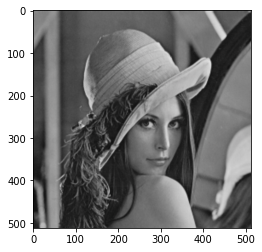

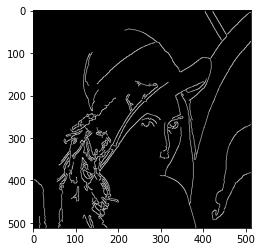

In [ ]:
import numpy as np
import cv2


#carrega imagem
img = cv2.imread('lena.png')
plt.imshow(img, cmap="Greys_r", vmin=0, vmax=255); plt.show()

min_contrast = 50
max_contrast = 200

imgfb = cv2.GaussianBlur(img,(5,5),0)
imgf = cv2.Canny(imgfb, min_contrast, max_contrast)

plt.imshow(imgf,cmap="Greys_r", vmin=0, vmax=255);
plt.show()

## Desafio 3

O Filtro de Canny é um dos mais utilizados até hoje, por ser robusto e apresentar bons resultados. Implemente o detector de bordas de canny e analise os efeitos alterandos os valores de threshold.

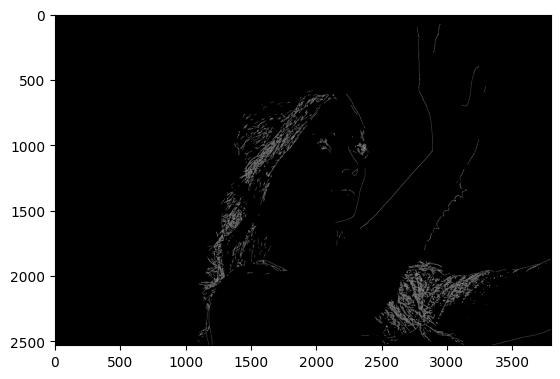

In [45]:
#Seu código

min_contrast = 100
max_contrast = 200

ciriCanny = cv2.Canny(ciri, min_contrast, max_contrast)

plt.imshow(ciriCanny,cmap="Greys_r", vmin=0, vmax=255);
plt.show()

**FILTRO DE LIMIARIZAÇÃO**

O filtro de **limiariazação** é converte uma imagem em tons de ciza para uma imagem binaria.

Podemos utilizar diversas tecnicas de limiarização, cada um com sua particularidade, leia a documentação para mais detalhes:

cv2.THRESH_BINARY
cv2.THRESH_BINARY_INV
cv2.THRESH_TRUNC
cv2.THRESH_TOZERO
cv2.THRESH_TOZERO_INV
cv2.THRESH_OTSU


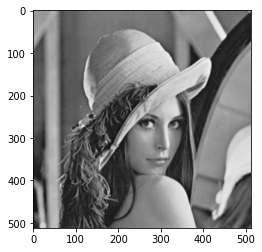

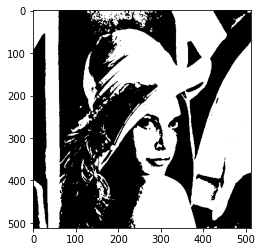

In [ ]:
import numpy as np
import cv2


#carrega imagem
image = cv2.imread('lena.png')
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(img,cmap="Greys_r", vmin=0, vmax=255); plt.show()


ret3,th3 = cv2.threshold(img,0,255,cv2.THRESH_OTSU)

plt.imshow(th3,cmap="Greys_r", vmin=0, vmax=255); plt.show()



**FILTRO DE SOBREPOSIÇÃO DE IMAGENS**

O filtro de **sobreposição** mescla duas imagens gerando efeito de sobreposição, ou Blending.

A operação da imagem de saida é a seguinte: g(x)=(1−α)∗f0(x)+α∗f1(x)

(512, 512, 3) (512, 512, 3)


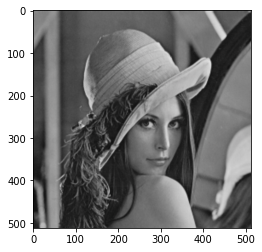

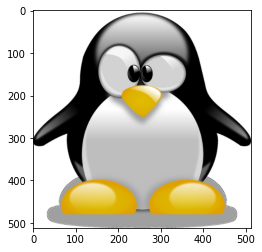

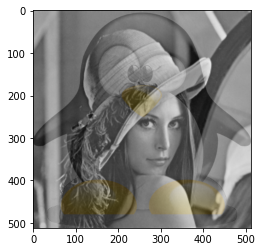

In [ ]:
import numpy as np
import cv2

alpha = 0.8
beta = (1.0 - alpha)

src1 = cv2.imread("lena.png")
src2 = cv2.imread("tux.png")
src2= cv2.cvtColor(src2, cv2.COLOR_BGR2RGB )

src2 = cv2.resize(src2, src1.shape[1::-1])
print(src1.shape, src2.shape)


dst = cv2.addWeighted(src1, alpha, src2, beta, 0.0)


plt.imshow(src1); plt.show()
plt.imshow(src2); plt.show()
plt.imshow(dst); plt.show()

## Desafio 4

O filtro de sobel calcula a primeira derivada, isso pode ser feito na direção de X ou em Y. Faça uma implementação que junta os efeitos das duas derivadas de sobel

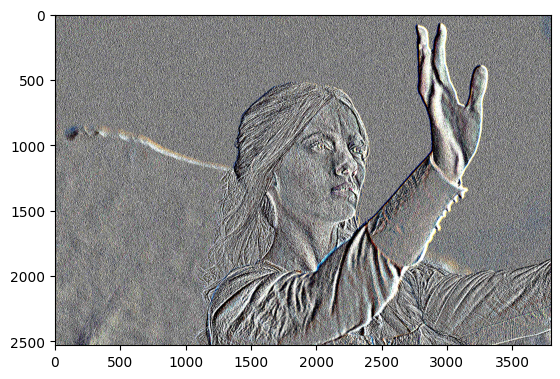

In [65]:
#Seu código aqui.


SOMA = SX + LP

plt.imshow(SOMA, cmap="Greys_r", vmin=0, vmax=255);
plt.show()


